In [6]:
import os
import re
import pandas as pd

# Path to the specific CSV file
file_path = './comments/Ed Sheeran - Shape of You (Official Music Video).csv'

# Compile the emoji detection pattern
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    "\U00002702-\U000027B0"  # Miscellaneous Symbols
    "\U000024C2-\U0001F251"  # Enclosed characters
    "]+", flags=re.UNICODE
)

# Process the specific file
try:
    # Use on_bad_lines='skip' to skip malformed rows
    df = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8', engine='python')
    df['video'] = os.path.basename(file_path)  # Add a column to identify the source file
    df['contains_emoji'] = df['comment'].str.contains(emoji_pattern, na=False)  # Identify rows with emojis
    print(f"Total records in the file: {df.shape[0]}")
    print(f"Records with emojis: {df['contains_emoji'].sum()}")
    
    # Display the first few rows for verification
    print(df.head())
except Exception as e:
    print(f"Error processing file {file_path}: {e}")


Total records in the file: 50000
Records with emojis: 21787
                    user_id           username           comment  likes  \
0  UCPSnqmDrfCF0rTz_ao75isQ        @lovely0015     Yeah  me 2024      0   
1  UCx9sGPAFjDDKw-NtGukSw5Q        @damixytpro  Anyone of 2024??      0   
2  UC38hIbUta2QRcKBRitf2TJQ       @CollenKatse                😮😮      0   
3  UCSvnu2KWR339GSucWhOQwCA  @EFRATADANIEL-e1i        🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗      0   
4  UCxIniTPgU0UHqFM9uGmWsMQ   @ElijahGuillaume                Me      0   

   replies                  date  \
0        0  2024-10-20T16:10:44Z   
1        0  2024-10-20T15:42:58Z   
2        0  2024-10-20T15:20:39Z   
3        0  2024-10-20T15:16:27Z   
4        0  2024-10-20T15:10:01Z   

                                               video  contains_emoji  
0  Ed Sheeran - Shape of You (Official Music Vide...           False  
1  Ed Sheeran - Shape of You (Official Music Vide...           False  
2  Ed Sheeran - Shape of You (Official Music Vide...       

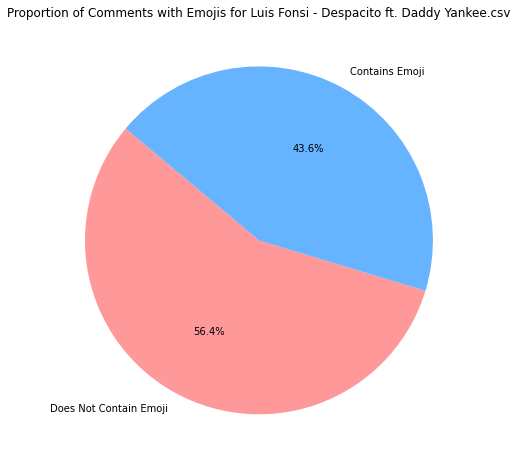

In [7]:
import matplotlib.pyplot as plt
# Count rows with and without emojis
emoji_counts = df['contains_emoji'].value_counts()
labels = ['Does Not Contain Emoji','Contains Emoji']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emoji_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Comments with Emojis for Luis Fonsi - Despacito ft. Daddy Yankee.csv')
plt.show()

In [8]:
def count_emojis(text):
    return len(emoji_pattern.findall(text))
data_emoji = df[df['contains_emoji'] == True]
data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)
data_filtered = data_emoji[(data_emoji['emoji_count'] <= 4) & (data_emoji['comment'].str.len() <= 100)]
data_filtered

<ipython-input-8-9dc44fd67257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)


,user_id,username,comment,likes,replies,date,video,contains_emoji,emoji_count
2,UC38hIbUta2QRcKBRitf2TJQ,@CollenKatse,😮😮,0,0,2024-10-20T15:20:39Z,Ed Sheeran - Shape of You (Official Music Vide...,True,1
8,UCQ7srkSloxlYUiHU6O1pCZg,@theviper679,From a street artist to everyone’s favourite ❤,0,0,2024-10-20T14:20:03Z,Ed Sheeran - Shape of You (Official Music Vide...,True,1
9,UC8ZdDEgOyRmdmaJVQxOVM-g,@thomnguyenthi5015,Có ai là người Việt Nam đang xem ko 😁,1,0,2024-10-20T14:13:01Z,Ed Sheeran - Shape of You (Official Music Vide...,True,1
10,UCBRaLg9lOAeLV80DJaFuOPA,@MNNahid-dx7vk,0:35 to 0:55 is the best part of the song for ...,0,0,2024-10-20T14:10:31Z,Ed Sheeran - Shape of You (Official Music Vide...,True,1
17,UCaAPUyAbMcHXV9aL9ejq-Wg,@anjalidhayal120,Ye song anytime suna jne vala h all time fav. ❤❤,1,0,2024-10-20T13:40:37Z,Ed Sheeran - Shape of You (Official Music Vide...,True,1
...,...,...,...,...,...,...,...,...,...
49988,UC6JI2XFk0D1fXj02oGXQTPw,@naughtygamer6570,Almost 6 years but this song feels like it jus...,17,1,2023-04-08T04:37:26Z,Ed Sheeran - Shape of You (Official Music Vide...,True,1
49994,UCJv8owrDmNBDaz5WFVq10OA,@awdheshravidasadvocate7673,8th April 2023..let's see how many legends are...,0,0,2023-04-08T01:43:42Z,Ed Sheeran - Shape of You (Official Music Vide...,True,1
49995,UCz8m6YQcQ6uPI2QxFXsAt6A,@brentonjamandre383,🔥🔥🔥,0,0,2023-04-08T01:40:35Z,Ed Sheeran - Shape of You (Official Music Vide...,True,1
49998,UC3UD3QKzV53GSLIxi0iCtVw,@shameekisreal5185,"6 Billion and Counting, Kandi and Ed Did That ...",1,0,2023-04-08T01:01:39Z,Ed Sheeran - Shape of You (Official Music Vide...,True,1


In [ ]:
import os
from deep_translator import GoogleTranslator
from langdetect import detect
import pandas as pd
import re
def extract_emojis(text):
    """Extract all emojis from a given text."""
    return ''.join(emoji_pattern.findall(text))

# Define the function to translate text
def translate_to_english(row):
    try:
        text = row['comment']
        row_number = row.name + 1  # Get the row number (1-indexed)
        
        # Extract emojis
        emojis = extract_emojis(text)
        
        # Remove emojis before translation
        text_without_emojis = emoji_pattern.sub('', text).strip()
        
        # Handle emoji-only text or empty text
        if not text_without_emojis:
            print(f"Row {row_number}: Text contains only emojis or is empty: {text}")
            return text  # Return original text if no translatable content
        
        # Detect language
        detected_language = detect(text_without_emojis)
        print(f"Row {row_number}: Detected language: {detected_language}")

        # Translate if necessary
        if detected_language != 'en':
            translation = GoogleTranslator(target='en').translate(text_without_emojis)
        else:
            translation = text_without_emojis  # Keep the original if it's English

        # Append emojis to the translated text
        translated_with_emojis = f"{translation} {emojis}".strip()
        
        print(f"Row {row_number}: Original: {text}, Translated: {translated_with_emojis}")
        return translated_with_emojis
    except Exception as e:
        print(f"Row {row_number}: Error translating text: {text}, Error: {e}")
        return text
output_folder = './translated_comments_folder2'
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, 'Ed Sheeran - Shape of You (Official Music Video)')

# Process each row and save results
with open(output_file, 'a', encoding='utf-8') as f:
    # Write header if the file is empty
    if os.path.getsize(output_file) == 0:
        f.write("row_number,original_comment,translated_comment\n")
    
    # Apply the translation function row by row
    for _, row in data_emoji.iterrows():
        row_number = row.name + 1
        original_comment = row['comment']
        translated_comment = translate_to_english(row)
        
        # Append the row to the CSV
        f.write(f"{row_number},{original_comment},{translated_comment}\n")
        print(f"Row {row_number} saved.")

Row 3: Text contains only emojis or is empty: 😮😮
Row 3 saved.
Row 9: Detected language: en
Row 9: Original: From a street artist to everyone’s favourite ❤, Translated: From a street artist to everyone’s favourite ❤
Row 9 saved.
Row 10: Detected language: vi
Row 10: Original: Có ai là người Việt Nam đang xem ko 😁, Translated: Is anyone Vietnamese watching? 😁
Row 10 saved.
Row 11: Detected language: en
Row 11: Original: 0:35 to 0:55 is the best part of the song for only mine ,i think 🥰😍, Translated: 0:35 to 0:55 is the best part of the song for only mine ,i think 🥰 😍
Row 11 saved.
Row 18: Detected language: it
Row 18: Original: Ye song anytime suna jne vala h all time fav. ❤❤, Translated: Ye song anytime suna jne vala h all time fav. ❤❤
Row 18 saved.
Row 19: Detected language: en
Row 19: Original: Love from Bangladesh ❤😂, Translated: Love from Bangladesh ❤😂
Row 19 saved.
Row 20: Detected language: en
Row 20: Original: Anyone here in 2050 💀, Translated: Anyone here in 2050 💀
Row 20 saved.

Row 157: Original: Nice bro 💋💋💋💋🥳, Translated: Nice bro 🥳 💋💋💋💋
Row 157 saved.
Row 161: Detected language: en
Row 161: Original: Who just likes scrolling through comments for fun?❤🎉, Translated: Who just likes scrolling through comments for fun? ❤🎉
Row 161 saved.
Row 162: Error translating text: 2056年も見てるやついる？, Error: No features in text.
Row 162 saved.
Row 164: Text contains only emojis or is empty: これを見た人もしくは翻訳した人は高評価を👍️
Row 164 saved.
Row 165: Detected language: en
Row 165: Original: Anyone here from Nepal 🇳🇵❣️, Translated: Anyone here from Nepal 🇳🇵❣️
Row 165 saved.
Row 169: Detected language: nl
Row 169: Original: Go of deinds groute 😂 october 2024 ok Helô gronteder, Translated: Go of deinds groute  october 2024 ok Helô gronteder 😂
Row 169 saved.
Row 170: Detected language: en
Row 170: Original: Nestey tom brubre How filtime Gon pruduc hegnstey honter frentoy dengrer ❤vronck jentnty krenter xenwetrey 😮seinds dreid wenter, Translated: Nestey tom brubre How filtime Gon pruduc hegnstey

Row 316: Original: Pin pls📌?, Translated: Pin pls? 📌
Row 316 saved.
Row 318: Detected language: cy
Row 318: Original: LOVE YOU ❤, Translated: LOVE YOU ❤
Row 318 saved.
Row 319: Detected language: ca
Row 319: Original: Yes I am❤, Translated: Yes I am ❤
Row 319 saved.
Row 322: Error translating text: もう7年前なんや。まだ聴いてる人いる？　追記　日本人いる？　またまた追記　日本人いてほしいな, Error: No features in text.
Row 322 saved.
Row 323: Detected language: en
Row 323: Original: Who is watching this video in 2026?❤, Translated: Who is watching this video in 2026? ❤
Row 323 saved.
Row 326: Error translating text: 2024.10.17
노래 너무 좋다..최애 곡 안에 드는듯.., Error: No features in text.
Row 326 saved.
Row 329: Detected language: en
Row 329: Original: Who are after seeing yet 😅, Translated: Who are after seeing yet 😅
Row 329 saved.
Row 330: Text contains only emojis or is empty: 🕊️
Row 330 saved.
Row 331: Detected language: tl
Row 331: Original: Yes alavyo baby❤❤❤❤❤😊❤❤❤❤❤❤❤❤❤❤❤, Translated: Yes alavyo baby ❤❤❤❤❤😊❤❤❤❤❤❤❤❤❤❤❤
Row 331 saved.
R

Row 429: Original: 0.25x💀, Translated: 0.25x 💀
Row 429 saved.
Row 431: Detected language: en
Row 431: Original: Bro today is the same history 😭, Translated: Bro today is the same history 😭
Row 431 saved.
Row 434: Detected language: en
Row 434: Original: 👇Whos here in November 1706-2050❤❤❤❤, Translated: Whos here in November 1706-2050 👇❤❤❤❤
Row 434 saved.
Row 436: Text contains only emojis or is empty: ❤❤❤
Row 436 saved.
Row 437: Detected language: tl
Row 437: Original: Anyone 2070..? 💯, Translated: Anyone 2070..? 💯
Row 437 saved.
Row 441: Detected language: ru
Row 441: Original: Нравиться голос Ширана😊, Translated: I like Sheeran's voice 😊
Row 441 saved.
Row 442: Detected language: en
Row 442: Original: LOVE 😍 SHE IS HOT ❤‍🔥, Translated: LOVE  SHE IS HOT ‍ 😍❤🔥
Row 442 saved.
Row 444: Detected language: en
Row 444: Original: October 2024- Still can't get over this song  😩, Translated: October 2024- Still can't get over this song 😩
Row 444 saved.
Row 445: Detected language: pt
Row 445: O

Row 607: Original: assalamu'alaikum wrb salam kenal RIVALDO SELIAN Aceh Tenggara Kutacane🙏🌹🌹🌹🌹, I Love❤❤❤ the🌹🌹🌹🌹 song's very good👍🙏,, Translated: Assalamu'alaikum wrb Greetings from RIVALDO SELIAN Southeast Aceh Kutacane, I Love the song's very good, 🙏🌹🌹🌹🌹❤❤❤🌹🌹🌹🌹👍🙏
Row 607 saved.
Row 608: Error translating text: 🎉🎉🎉  2024........, Error: No features in text.
Row 608 saved.
Row 609: Error translating text: 한국에서 최근 성범죄 허위신고가 수법이 날로 교묘해지고 특정 사이트(여초사이트 등등)에서 그 내용을 공유함에도 수사기관들은 눈가리고 아웅 식으로 무조건 여자의 진술 만으로 남성의 모든 증거를 묵살, 은폐하면서까지 무조건 기소시키고 있는 실정입니다. 이런 행위를 하는 수사기관들(수사관,검사들)도 '무고 공범'이란 것을 모두가 느끼셨음 좋겠네요. 
 진심으로 우리나라에서 이런 쓰레기같은 법체계를 관행이라며 실적쌓기와 책임떠넘기기로 아직도 만연하고 있다는 점이 역겹고 더럽네요. 국민들이 이런 쓰레기같은 성범죄 허위신고에  목소리을 내고 관심 가져주세요. 현재 성범죄 허위고소 카페인 '억울이 카페'에 가입자가 바로 2400명이 넘어가고 있습니다. 진심으로 양심을 갖고 수사기관이 올바른 수사를 기대하기 힘든 상황이고 이대로 여러분들이 관심갖지 않으면 여러분 또는 여러분의 가족들이 그 억울한 피해자가 언제든 될 수 있습니다!!!, Error: No features in text.
Row 609 saved.
Row 610: Detected language: lv
Row 610: Original: 6,346,125,634 vistas 💀, Translat

Row 723: Original: SINGLE 😅👇, Translated: SINGLE 😅👇
Row 723 saved.
Row 724: Detected language: en
Row 724: Original: I just realized he was talking about smexy without the m and y😭😭😭, Translated: I just realized he was talking about smexy without the m and y 😭😭😭
Row 724 saved.
Row 727: Detected language: en
Row 727: Original: I AM HERE✊🏼, Translated: I AM HERE ✊🏼
Row 727 saved.
Row 732: Text contains only emojis or is empty: 🗺🌤⛅️
Row 732 saved.
Row 736: Detected language: en
Row 736: Original: Is it just me or when I listened to this song I thought when he meant by I’m in love with ur body he meant something inapropriate😅 but I’m pretty sure now it’s just because she is strong or am I wrong is he still thinking the inappropriate thing????, Translated: Is it just me or when I listened to this song I thought when he meant by I’m in love with ur body he meant something inapropriate but I’m pretty sure now it’s just because she is strong or am I wrong is he still thinking the inappropriate

Row 874: Original: Τέλειο 😊😊😊, Translated: Perfect 😊😊😊
Row 874 saved.
Row 875: Detected language: en
Row 875: Original: hai you song very very good😮😮😮😮, Translated: hai you song very very good 😮😮😮😮
Row 875 saved.
Row 877: Detected language: en
Row 877: Original: In october listening to music ❤❤❤❤❤❤❤ shape of You❤❤❤❤, Translated: In october listening to music  shape of You ❤❤❤❤❤❤❤❤❤❤❤
Row 877 saved.
Row 883: Detected language: en
Row 883: Original: the top comment says oct 11 tomorrow it will be 12 right?.editing comment 😂, Translated: the top comment says oct 11 tomorrow it will be 12 right?.editing comment 😂
Row 883 saved.
Row 887: Text contains only emojis or is empty: 🙏
Row 887 saved.
Row 888: Text contains only emojis or is empty: 굿굿
Row 888 saved.
Row 890: Text contains only emojis or is empty: ❤❤❤
Row 890 saved.
Row 896: Detected language: en
Row 896: Original: Ronaldo created a channel ☠️☠️☠️, Translated: Ronaldo created a channel ☠️☠️☠️
Row 896 saved.
Row 898: Text contains onl

Row 1003: Original: 2024/10/10 Taiwan❤, Translated: 2024/10/10 Taiwan ❤
Row 1003 saved.
Row 1005: Detected language: en
Row 1005: Original: 2024 October?❤😂, Translated: 2024 October? ❤😂
Row 1005 saved.
Row 1006: Text contains only emojis or is empty: 我是台灣人
Row 1006 saved.
Row 1007: Detected language: ru
Row 1007: Original: Я 1 русская?😢, Translated: Am I the 1st Russian? 😢
Row 1007 saved.
Row 1009: Detected language: en
Row 1009: Original: 2024 October ??🎉, Translated: 2024 October ?? 🎉
Row 1009 saved.
Row 1010: Detected language: ro
Row 1010: Original: 10 oct 2024 ❤, Translated: 10 oct 2024 ❤
Row 1010 saved.
Row 1012: Detected language: en
Row 1012: Original: Just remembering 😂💃, Translated: Just remembering 😂💃
Row 1012 saved.
Row 1013: Error translating text: 2:18 😅, Error: No features in text.
Row 1013 saved.
Row 1014: Detected language: en
Row 1014: Original: Addicted to this song ✨✨, Translated: Addicted to this song ✨✨
Row 1014 saved.
Row 1016: Detected language: en
Row 1016: Ori

Row 1116: Original: Me😅, Translated: Me 😅
Row 1116 saved.
Row 1122: Text contains only emojis or is empty: 🎉😂🎉😂😢
Row 1122 saved.
Row 1127: Detected language: it
Row 1127: Original: Last scene crack me up 😭, Translated: Last scene crack me up 😭
Row 1127 saved.
Row 1134: Detected language: en
Row 1134: Original: Anyone at October 2024😂, Translated: Anyone at October 2024 😂
Row 1134 saved.
Row 1135: Detected language: tl
Row 1135: Original: Amazing song ...❤, Translated: Amazing song ... ❤
Row 1135 saved.
Row 1140: Detected language: tr
Row 1140: Original: Yes ❤🎉, Translated: Yes ❤🎉
Row 1140 saved.
Row 1141: Detected language: en
Row 1141: Original: 2025 remember you ❤, Translated: 2025 remember you ❤
Row 1141 saved.
Row 1142: Detected language: en
Row 1142: Original: My favourite song of all time ❤❤❤❤❤🫠, Translated: My favourite song of all time 🫠 ❤❤❤❤❤
Row 1142 saved.
Row 1143: Text contains only emojis or is empty: ❤
Row 1143 saved.
Row 1146: Error translating text: 1:23 ❤, Error: No f

Row 1231: Original: 2028😂 me 🎉, Translated: 2028 me 😂🎉
Row 1231 saved.
Row 1236: Detected language: en
Row 1236: Original: Who is Indian🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳 

(Thanks for 2 likes) 🥰, Translated: Who is Indian 

(Thanks for 2 likes) 🥰 🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳
Row 1236 saved.
Row 1237: Detected language: vi
Row 1237: Original: hh😂😂, Translated: hh 😂😂
Row 1237 saved.
Row 1238: Detected language: nl
Row 1238: Original: 2024 December ❤❤, Translated: 2024 December ❤❤
Row 1238 saved.
Row 1240: Error translating text: 我需要請求有多少人一天重複聽50遍的？, Error: No features in text.
Row 1240 saved.
Row 1242: Detected language: en
Row 1242: Original: 7 October 🔥, Translated: 7 October 🔥
Row 1242 saved.
Row 1244: Detected language: tl
Row 1244: Original: Any PAKISTANi ❤, Translated: Any PAKISTANi ❤
Row 1244 saved.
Row 1248: Text contains only emojis or is empty: 🎉🎉🎉
Row 1248 saved.
Row 1254: Text contains only emojis or is empty: ❤
Row 1254 saved.
Row 1255: Detected language: en
Row 1255: Ori

Row 1366: Original: Nice❤, Translated: Nice ❤
Row 1366 saved.
Row 1367: Detected language: en
Row 1367: Original: A real 💎 from Ed.❤❤❤this song to the fullest....Mellifluous❤, Translated: A real  from Ed.this song to the fullest....Mellifluous 💎❤❤❤❤
Row 1367 saved.
Row 1368: Text contains only emojis or is empty: 😊😊😊😊
Row 1368 saved.
Row 1369: Detected language: en
Row 1369: Original: Arjit Singh ✖️Ed Sheeran ✔️, Translated: Arjit Singh Ed Sheeran ✖️✔️
Row 1369 saved.
Row 1372: Detected language: en
Row 1372: Original: Anyone Watching Today? ( Oct 6 2024) 🙋🏻‍♂️🙋🏻‍♂️, Translated: Anyone Watching Today? ( Oct 6 2024) ‍‍ 🙋🏻♂️🙋🏻♂️
Row 1372 saved.
Row 1377: Error translating text: ❤❤❤❤❤❤❤️‍🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥, Error: No features in text.
Row 1377 saved.
Row 1379: Error translating text: 이 노래 개조아요.❤😊😊, Error: No features in text.
Row 1379 saved.
Row 1380: Detected language: en
Row 1380: Original: 👇who comes to 2024??🥲, Translated: who comes to 2024??🥲 👇
Row 1380 saved.
Row 1383: Text contains only e

Row 1517: Original: ❤nice song bro keep uo, Translated: nice song bro keep uo ❤
Row 1517 saved.
Row 1518: Detected language: en
Row 1518: Original: "Im in love with the shape of you"🔥🔥🔥, Translated: "Im in love with the shape of you" 🔥🔥🔥
Row 1518 saved.
Row 1520: Detected language: en
Row 1520: Original: I think I, am the only guy listening this song in 2024 😢, Translated: I think I, am the only guy listening this song in 2024 😢
Row 1520 saved.
Row 1522: Detected language: de
Row 1522: Original: Me
😮, Translated: Me 😮
Row 1522 saved.
Row 1524: Detected language: en
Row 1524: Original: I listen to it every night 🌙 🎉❤, Translated: I listen to it every night 🌙🎉❤
Row 1524 saved.
Row 1530: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤❤❤
Row 1530 saved.
Row 1532: Detected language: vi
Row 1532: Original: 2:57 CMON BE MY BABY CMON 🗣️🔥🗣️🔥, Translated: 2:57 CMON BE MY BABY CMON 🗣️🔥🗣️🔥
Row 1532 saved.
Row 1537: Detected language: en
Row 1537: Original: any one in october 2024❤, Translated: a

Row 1675: Original: Anyone in 2025😮, Translated: Anyone in 2025 😮
Row 1675 saved.
Row 1678: Text contains only emojis or is empty: 𝐰𝐚𝐜𝐡𝐢𝐧𝐠 𝐟𝐫𝐨𝐦 𝐛𝐚𝐧𝐠𝐥𝐚𝐝𝐞𝐬𝐡❤❤😂🎉🎉😂😂 𝐰𝐞 𝐚𝐫𝐞 𝐯𝐞𝐫𝐲 𝐟𝐮𝐧𝐧𝐲😂😅😊
Row 1678 saved.
Row 1680: Detected language: tr
Row 1680: Original: 6.4b 😮, Translated: 6.4b 😮
Row 1680 saved.
Row 1681: Detected language: en
Row 1681: Original: Who is here in october 🎉😂❤?, Translated: Who is here in october ? 🎉😂❤
Row 1681 saved.
Row 1682: Detected language: en
Row 1682: Original: Is anybody from 2069 😂, Translated: Is anybody from 2069 😂
Row 1682 saved.
Row 1685: Detected language: pt
Row 1685: Original: Quem está assistindo essa obra prima em pleno 2024 deixa o like😍🎉❤
👇, Translated: Whoever is watching this masterpiece in 2024, leave a like 😍🎉❤👇
Row 1685 saved.
Row 1689: Detected language: en
Row 1689: Original: I'm addicted to this song 😢, Translated: I'm addicted to this song 😢
Row 1689 saved.
Row 1690: Detected language: en
Row 1690: Original: ```I ♥️ Love This Song```『+×』♥️♥️, Tra

Row 1716: Original: Love it❤, Translated: Love it ❤
Row 1716 saved.
Row 1717: Text contains only emojis or is empty: 中村晃〜
Row 1717 saved.
Row 1720: Detected language: tl
Row 1720: Original: Anly！ カバー素敵なので世界中の人に聴いて欲しい！！, Translated: Anly ！カバー素敵なので世界中の人に聴いて欲しい！！
Row 1720 saved.
Row 1721: Error translating text: 2024でも見てるひといる？🤓
て言ってる人本当に
何のためにいるんやろ、, Error: No features in text.
Row 1721 saved.
Row 1723: Detected language: en
Row 1723: Original: anyone here so hear the masterpiece in October 2024 🎉🗿, Translated: anyone here so hear the masterpiece in October 2024 🎉🗿
Row 1723 saved.
Row 1724: Detected language: en
Row 1724: Original: 2 October 2024❤🎉, Translated: 2 October 2024 ❤🎉
Row 1724 saved.
Row 1725: Detected language: en
Row 1725: Original: Who's watch today 👇🇮🇳, Translated: Who's watch today 👇🇮🇳
Row 1725 saved.
Row 1726: Detected language: en
Row 1726: Original: Anyone in October 2024👇, Translated: Anyone in October 2024 👇
Row 1726 saved.
Row 1728: Detected language: en
Row 1728: Or

Row 1849: Original: 1 de outubro, e eu aqui ouvindo uma das músicas mais populares de todos os tempos, mesmo 7 anos depois ❤, Translated: October 1st, and here I am listening to one of the most popular songs of all time, even 7 years later ❤
Row 1849 saved.
Row 1850: Detected language: en
Row 1850: Original: Anyone in october 2024❤, Translated: Anyone in october 2024 ❤
Row 1850 saved.
Row 1856: Detected language: en
Row 1856: Original: Any one in October 2024❤❤, Translated: Any one in October 2024 ❤❤
Row 1856 saved.
Row 1857: Text contains only emojis or is empty: ❤❤❤❤❤
Row 1857 saved.
Row 1865: Text contains only emojis or is empty: エド・シーラン
Row 1865 saved.
Row 1866: Detected language: en
Row 1866: Original: Peoples  who are listening this masterpiece in october 2024 ??? 😊😊😊😊, Translated: Peoples  who are listening this masterpiece in october 2024 ??? 😊😊😊😊
Row 1866 saved.
Row 1868: Detected language: en
Row 1868: Original: 1 october SE hello 😅, Translated: 1 october SE hello 😅
Row 1868

Row 2041: Original: Hfcdogjgughhhdfdggh😂, Translated: Hfcdogjgughhhdfdggh 😂
Row 2041 saved.
Row 2044: Error translating text: 2025😂, Error: No features in text.
Row 2044 saved.
Row 2045: Detected language: af
Row 2045: Original: What is 6.3B views 🙄, Translated: What is 6.3B views 🙄
Row 2045 saved.
Row 2050: Detected language: en
Row 2050: Original: Can't believe that this song was released before 7 years 🤌🏻💕
Gang 2024 keep slaying 🔥, Translated: Can't believe that this song was released before 7 years 🤌
Gang 2024 keep slaying 🏻💕🔥
Row 2050 saved.
Row 2063: Detected language: en
Row 2063: Original: always hear this masterpiece in every supermarkets 💀, Translated: always hear this masterpiece in every supermarkets 💀
Row 2063 saved.
Row 2070: Detected language: en
Row 2070: Original: Anyone in September 28th 2024?? Uk 🇬🇧??, Translated: Anyone in September 28th 2024?? Uk ?? 🇬🇧
Row 2070 saved.
Row 2075: Detected language: tl
Row 2075: Original: Anyone In 2024 ?🥹❤️, Translated: Anyone In 202

Row 2182: Original: Anyone today 🎉, Translated: Anyone today 🎉
Row 2182 saved.
Row 2185: Detected language: en
Row 2185: Original: Anyone September 28 please like❤, Translated: Anyone September 28 please like ❤
Row 2185 saved.
Row 2187: Detected language: pt
Row 2187: Original: Alguém do brasil. E lembram-se da música do whinderson nunes😂, Translated: Someone from Brazil. And do you remember Whinderson Nunes' song? 😂
Row 2187 saved.
Row 2189: Detected language: en
Row 2189: Original: Your music is very good, I like it the most 😍👍, Translated: Your music is very good, I like it the most 😍👍
Row 2189 saved.
Row 2190: Error translating text: 0:00個人的にここから最高, Error: No features in text.
Row 2190 saved.
Row 2191: Detected language: id
Row 2191: Original: 27 sep 2024❤, Translated: 27 sep 2024 ❤
Row 2191 saved.
Row 2192: Detected language: en
Row 2192: Original: 7years ago "english songs" search results 😆, Translated: 7years ago "english songs" search results 😆
Row 2192 saved.
Row 2193: Detecte

Row 2336: Original: Very good😊, Translated: Very good 😊
Row 2336 saved.
Row 2339: Error translating text: 2024🙂😌, Error: No features in text.
Row 2339 saved.
Row 2341: Detected language: th
Row 2341: Original: ❤ 😊 อ้วนขอร้องดีๆคับผมเพื่อนยักษ์มีแต่เราไปหาเรื่องใส่ตัว, Translated: Fatty, please be gentle, my giant friend. It's just us who cause trouble for ourselves. ❤😊
Row 2341 saved.
Row 2344: Detected language: ro
Row 2344: Original: Masterpiece😊, Translated: Masterpiece 😊
Row 2344 saved.
Row 2348: Detected language: en
Row 2348: Original: I love thos song❤, Translated: I love thos song ❤
Row 2348 saved.
Row 2356: Text contains only emojis or is empty: ❤❤
Row 2356 saved.
Row 2357: Text contains only emojis or is empty: 😮😊
Row 2357 saved.
Row 2359: Detected language: en
Row 2359: Original: Anyone watching this masterpiece today😉🤩🤌❤️, Translated: Anyone watching this masterpiece today🤩🤌 😉❤️
Row 2359 saved.
Row 2360: Text contains only emojis or is empty: 日本の方はいらっしゃいますか？
Row 2360 saved.

Row 2449: Original: I love your videos! 🎉🎉🎉🎉🎉🎉🎉🎉, Translated: I love your videos! 🎉🎉🎉🎉🎉🎉🎉🎉
Row 2449 saved.
Row 2450: Detected language: en
Row 2450: Original: What is my favorite song good job 💕👍🏻😅, Translated: What is my favorite song good job 💕👍🏻😅
Row 2450 saved.
Row 2455: Detected language: en
Row 2455: Original: This song is also popular inJapan 🇯🇵, Translated: This song is also popular inJapan 🇯🇵
Row 2455 saved.
Row 2459: Text contains only emojis or is empty: ❤❤❤❤❤❤
Row 2459 saved.
Row 2460: Text contains only emojis or is empty: ❤🇧🇩✅
Row 2460 saved.
Row 2462: Detected language: en
Row 2462: Original: This is an exemplary song 🎵, Translated: This is an exemplary song 🎵
Row 2462 saved.
Row 2464: Detected language: en
Row 2464: Original: Love from 🇮🇳🇮🇳❤, Translated: Love from 🇮🇳🇮🇳❤
Row 2464 saved.
Row 2466: Detected language: en
Row 2466: Original: I love is song 
  🔽, Translated: I love is song 🔽
Row 2466 saved.
Row 2469: Detected language: en
Row 2469: Original: anyone in Septemb

Row 2610: Original: Madrid 2017 flashback😢😢, Translated: Madrid 2017 flashback 😢😢
Row 2610 saved.
Row 2611: Detected language: it
Row 2611: Original: Amo esta cancionnnnnn.❤❤❤❤❤, Translated: I love this song. ❤❤❤❤❤
Row 2611 saved.
Row 2612: Detected language: pt
Row 2612: Original: 2017 real madrid 😞, Translated: 2017 real madrid 😞
Row 2612 saved.
Row 2613: Text contains only emojis or is empty: 🔥🔥💞
Row 2613 saved.
Row 2615: Detected language: en
Row 2615: Original: are y’all living in the future? 😂
y’all are saying sept 22 but it’s sept 21, Translated: are y’all living in the future? 
y’all are saying sept 22 but it’s sept 21 😂
Row 2615 saved.
Row 2616: Detected language: en
Row 2616: Original: 22 september 2024 still addicted to this song😝, Translated: 22 september 2024 still addicted to this song 😝
Row 2616 saved.
Row 2618: Text contains only emojis or is empty: 😻 😻 😻
Row 2618 saved.
Row 2619: Text contains only emojis or is empty: プロ野球のエド・シーランといったらソフトバンク　中村　晃でしょ
Row 2619 saved.
Row

Row 2733: Original: Omg ❤, Translated: Omg ❤
Row 2733 saved.
Row 2734: Text contains only emojis or is empty: ❤
Row 2734 saved.
Row 2735: Detected language: en
Row 2735: Original: I love the end. The way Ed can’t sit or stand up 😂, Translated: I love the end. The way Ed can’t sit or stand up 😂
Row 2735 saved.
Row 2737: Detected language: en
Row 2737: Original: Who watching this in 2024?
👇🏻
👇🏼
👇🏽
👇🏾
👇🏿
👇🏾
👇🏽
👇🏼
👇🏻                  XD, Translated: Who watching this in 2024?








                  XD 👇🏻👇🏼👇🏽👇🏾👇🏿👇🏾👇🏽👇🏼👇🏻
Row 2737 saved.
Row 2738: Detected language: en
Row 2738: Original: Wow already six billion, good song of course many people like❤❤ including me, fan from Malaysia, Translated: Wow already six billion, good song of course many people like including me, fan from Malaysia ❤❤
Row 2738 saved.
Row 2739: Detected language: fi
Row 2739: Original: Hello😂, Translated: Hello 😂
Row 2739 saved.
Row 2740: Text contains only emojis or is empty: ❤❤
Row 2740 saved.
Row 2744: Detected la

Row 2853: Original: I am very underrated 😢, Translated: I am very underrated 😢
Row 2853 saved.
Row 2856: Text contains only emojis or is empty: 🎉
Row 2856 saved.
Row 2857: Detected language: en
Row 2857: Original: If has been Centuries since I listened to this song 🎶 ❤, Translated: If has been Centuries since I listened to this song 🎶❤
Row 2857 saved.
Row 2860: Detected language: en
Row 2860: Original: I'm watching in 2024!!😊😊😊, Translated: I'm watching in 2024!! 😊😊😊
Row 2860 saved.
Row 2861: Detected language: no
Row 2861: Original: Love song ❤❤, Translated: Love song ❤❤
Row 2861 saved.
Row 2862: Text contains only emojis or is empty: 𝕿𝖍𝖎𝖘 𝕴𝖘 𝕸𝕬𝕾𝕿𝕰𝕽𝕻𝕴𝕰𝕮𝕰
Row 2862 saved.
Row 2864: Detected language: en
Row 2864: Original: Oh so it’s him 😢❤❤❤, Translated: Oh so it’s him 😢❤❤❤
Row 2864 saved.
Row 2867: Detected language: en
Row 2867: Original: After 2024 attendance here 😂, Translated: After 2024 attendance here 😂
Row 2867 saved.
Row 2870: Detected language: tl
Row 2870: Original: Nepal ba

Row 2989: Original: Tôi đã nghe 🇻🇳, Translated: I heard 🇻🇳
Row 2989 saved.
Row 2991: Detected language: id
Row 2991: Original: assalamu'alaikum wrb salam kenal RIVALDO SELIAN Aceh Tenggara kutacane🙏❤, I Love❤😘 the🌹🌹🌹🌹 song❤thank you👉😈😈😈😈 brymeed👉😈😈😈😈😈😈,, Translated: Assalamu'alaikum wrb Nice to meet you RIVALDO SELIAN Southeast Aceh Kutacane, I Love the song thank you brymeed, 🙏❤❤😘🌹🌹🌹🌹❤👉😈😈😈😈👉😈😈😈😈😈😈
Row 2991 saved.
Row 2993: Detected language: so
Row 2993: Original: i feel bad today 😢, Translated: i feel bad today 😢
Row 2993 saved.
Row 2995: Detected language: da
Row 2995: Original: Still Vibing ❤
This song never gets old, Translated: Still Vibing 
This song never gets old ❤
Row 2995 saved.
Row 2996: Detected language: en
Row 2996: Original: Who waching this masterpiece in September 2024❤, Translated: Who waching this masterpiece in September 2024 ❤
Row 2996 saved.
Row 2997: Detected language: en
Row 2997: Original: I Love this song since 4 yrs
Still haves a Vibes before then❤, Translat

Row 3112: Original: Viva Palestina libre 🇵🇸, Translated: Long live free Palestine 🇵🇸
Row 3112 saved.
Row 3114: Detected language: en
Row 3114: Original: Me, I am watching this in 2024❤❤ like right here
👇, Translated: Me, I am watching this in 2024 like right here ❤❤👇
Row 3114 saved.
Row 3115: Detected language: ar
Row 3115: Original: ابداع
❤❤❤❤, Translated: invention ❤❤❤❤
Row 3115 saved.
Row 3118: Detected language: it
Row 3118: Original: 😎🇧🇷pero Que temazo🔥💯🤑🦻, Translated: But what a great song🤑🦻 😎🇧🇷🔥💯
Row 3118 saved.
Row 3122: Text contains only emojis or is empty: ❤️
Row 3122 saved.
Row 3124: Detected language: en
Row 3124: Original: Anyone in September 2024? ❤, Translated: Anyone in September 2024? ❤
Row 3124 saved.
Row 3126: Detected language: en
Row 3126: Original: For me the number one song in the world 😇
I first listen to this song in 2022 and now in 2024 it still gives the same vibes and boost and inner enjoyment with happiness😇 
Thanks for writing this song very much., Transl

Row 3237: Original: 14 September 2024✋, Translated: 14 September 2024 ✋
Row 3237 saved.
Row 3240: Detected language: de
Row 3240: Original: 14 September 2024🎉, Translated: 14 September 2024 🎉
Row 3240 saved.
Row 3241: Detected language: en
Row 3241: Original: Who watching this in 2024 ❤, Translated: Who watching this in 2024 ❤
Row 3241 saved.
Row 3243: Text contains only emojis or is empty: とてつもなくかっこいいし、とてもテンションが上がる最高な曲！
Row 3243 saved.
Row 3244: Detected language: pt
Row 3244: Original: 6,6 Mliaden😶🫣, Translated: 6.6 billion🫣 😶
Row 3244 saved.
Row 3245: Error translating text: ↓↓2024年も聴いてる人🖐️, Error: No features in text.
Row 3245 saved.
Row 3249: Detected language: en
Row 3249: Original: Bring memories 😢❤, Translated: Bring memories 😢❤
Row 3249 saved.
Row 3250: Detected language: en
Row 3250: Original: IM WATSH IN THE 2024❤, Translated: IM WATSH IN THE 2024 ❤
Row 3250 saved.
Row 3253: Detected language: et
Row 3253: Original: Nostalgia🙂💗, Translated: Nostalgia 🙂💗
Row 3253 saved.
Row 3

Row 3365: Original: 6.3 billion☠️, Translated: 6.3 billion ☠️
Row 3365 saved.
Row 3366: Detected language: sv
Row 3366: Original: Still listening in 2024. 🎉, Translated: Still listening in 2024. 🎉
Row 3366 saved.
Row 3367: Text contains only emojis or is empty: ❤❤❤😅😅😅😅😂😂😂🎉🎉🎉🎉
Row 3367 saved.
Row 3368: Detected language: en
Row 3368: Original: Who IS here in Sénégal 2024 ❤❤, Translated: Who IS here in Sénégal 2024 ❤❤
Row 3368 saved.
Row 3369: Detected language: en
Row 3369: Original: 7 billion in 2025 September ❤, Translated: 7 billion in 2025 September ❤
Row 3369 saved.
Row 3372: Detected language: id
Row 3372: Original: He got super Saiyan😂, Translated: He got super Saiyan 😂
Row 3372 saved.
Row 3373: Detected language: en
Row 3373: Original: Only legends still listen to this masterpiece 2024 anyone ❤❤❤, Translated: Only legends still listen to this masterpiece 2024 anyone ❤❤❤
Row 3373 saved.
Row 3376: Detected language: en
Row 3376: Original: Listen on 0.75  thanks will be say after ❤

Row 3425: Original: ini lagu 2018 ya 😮, Translated: this is a 2018 song yeah 😮
Row 3425 saved.
Row 3429: Detected language: so
Row 3429: Original: Show!!😮, Translated: Show!! 😮
Row 3429 saved.
Row 3434: Detected language: sw
Row 3434: Original: ❤❤❤❤❤❤❤❤❤❤2024 watching, Translated: 2024 watching ❤❤❤❤❤❤❤❤❤❤
Row 3434 saved.
Row 3437: Detected language: fr
Row 3437: Original: Love you all 🫶🏼, Translated: Love you all 🫶 🏼
Row 3437 saved.
Row 3440: Detected language: it
Row 3440: Original: Still iconic🎉, Translated: Still iconic 🎉
Row 3440 saved.
Row 3444: Detected language: en
Row 3444: Original: This song is made in the 7 th birthday of mine but i still listening it from 2017 😊❤, Translated: This song is made in the 7 th birthday of mine but i still listening it from 2017 😊❤
Row 3444 saved.
Row 3445: Detected language: en
Row 3445: Original: I love the music 🎉🎉, Translated: I love the music 🎉🎉
Row 3445 saved.
Row 3446: Text contains only emojis or is empty: 日本人いる？
Row 3446 saved.
Row 3447:

Row 3599: Original: Anybody 2025 ❤😢😢, Translated: Anybody 2025 ❤😢😢
Row 3599 saved.
Row 3600: Detected language: so
Row 3600: Original: SOMEONE IN AFTERLIFE??✋✋, Translated: SOMEONE IN AFTERLIFE?? ✋✋
Row 3600 saved.
Row 3602: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤
Row 3602 saved.
Row 3605: Text contains only emojis or is empty: ❤❤❤❤
Row 3605 saved.
Row 3606: Detected language: en
Row 3606: Original: Who hear this song today..? ❤, Translated: Who hear this song today..? ❤
Row 3606 saved.
Row 3607: Detected language: pl
Row 3607: Original: ネクスト江戸wwwwwwwwwwwwwwwwwwwwwwww, Translated: wwwwwwwwwwwwwwwwwwwwwwwwwww ネクスト江戸
Row 3607 saved.
Row 3608: Error translating text: 9 /9/2024 ❤, Error: No features in text.
Row 3608 saved.
Row 3610: Detected language: en
Row 3610: Original: 8 Septembre 2024. 9:15 PM Crystal 😊🎉❤, Translated: 8 Septembre 2024. 9:15 PM Crystal 😊🎉❤
Row 3610 saved.
Row 3611: Detected language: id
Row 3611: Original: Balik lagi🗿🗿🗿, Translated: Come back again 🗿🗿🗿
Row 36

Row 3703: Original: صالح 🔥 💞 💓 💖 🔥 💔 💘 💨🌪️🫦🛸💫💎👄🫀💋👌✌️🧠👀🦴💕🫁💥🌠 ‏‪0:33‬‏ ‏‪0:33‬‏ ‏‪0:33‬‏ ‏‪0:33‬‏ ‏‪0:34‬‏ ‏‪0:34‬‏ ‏‪0:34‬‏ ‏‪0:34‬‏ ‏‪0:34‬‏ ‏‪0:34‬‏ ‏‪0:34‬‏, Translated: Saleh 🫦🫀🧠🦴🫁 0:33 0:33 0:33 0:33 0:34 0:34 0:34 0:34 🔥💞💓💖🔥💔💘💨🌪️🛸💫💎👄💋👌✌️👀💕💥🌠
Row 3703 saved.
Row 3704: Detected language: en
Row 3704: Original: Hi every one👋👋👋👋, Translated: Hi every one 👋👋👋👋
Row 3704 saved.
Row 3708: Detected language: cy
Row 3708: Original: Ew  do😊, Translated: That's it 😊
Row 3708 saved.
Row 3709: Detected language: en
Row 3709: Original: Today 8 September 2024 ❤, Translated: Today 8 September 2024 ❤
Row 3709 saved.
Row 3711: Detected language: en
Row 3711: Original: "Real Madrid training session 2017"😊, Translated: "Real Madrid training session 2017" 😊
Row 3711 saved.
Row 3724: Detected language: en
Row 3724: Original: Bruh when I remember hearing this as a 7 year old in 2017 and not understanding the lyrics 💀, Translated: Bruh when I remember hearing this as a 7 year old in 2017 and not understan

Row 3829: Original: Someone in September 2024?✋👀, Translated: Someone in September 2024? ✋👀
Row 3829 saved.
Row 3830: Text contains only emojis or is empty: この曲大好き
Row 3830 saved.
Row 3831: Error translating text: 中村晃一軍復帰記念 0:05, Error: No features in text.
Row 3831 saved.
Row 3832: Text contains only emojis or is empty: 今日からどこかでこの曲がまた流れる
Row 3832 saved.
Row 3836: Detected language: de
Row 3836: Original: 7 September 2024 ❤, Translated: 7 September 2024 ❤
Row 3836 saved.
Row 3839: Detected language: id
Row 3839: Original: Any Indian 🇮🇳, Translated: Any Indian 🇮🇳
Row 3839 saved.
Row 3841: Detected language: tl
Row 3841: Original: Anyone today?🙌, Translated: Anyone today? 🙌
Row 3841 saved.
Row 3844: Detected language: cs
Row 3844: Original: 2025✋🏽???❤touch 👍🏽, Translated: 2025???touch ✋🏽❤👍🏽
Row 3844 saved.
Row 3848: Error translating text: 이노래가 이노래임?🎉, Error: No features in text.
Row 3848 saved.
Row 3849: Detected language: en
Row 3849: Original: YUP I miss 2017 that was such a good yeah

Row 3957: Original: Camavinga female edition 😂😅, Translated: Camavinga female edition 😂😅
Row 3957 saved.
Row 3958: Text contains only emojis or is empty: ❤
Row 3958 saved.
Row 3961: Detected language: tr
Row 3961: Original: Uzbeklar bormi😊, Translated: Are there Uzbeks? 😊
Row 3961 saved.
Row 3962: Detected language: sl
Row 3962: Original: Jj❤❤, Translated: Jj ❤❤
Row 3962 saved.
Row 3963: Detected language: et
Row 3963: Original: August 2025👋, Translated: August 2025 👋
Row 3963 saved.
Row 3966: Text contains only emojis or is empty: ❤
Row 3966 saved.
Row 3967: Detected language: en
Row 3967: Original: I love you Ed Sheeran! You're like a millennial version of Elton John! So refreshing ❤, Translated: I love you Ed Sheeran! You're like a millennial version of Elton John! So refreshing ❤
Row 3967 saved.
Row 3969: Detected language: de
Row 3969: Original: Anyone seeing in August 2024❤❤, Translated: Anyone seeing in August 2024 ❤❤
Row 3969 saved.
Row 3974: Detected language: id
Row 3974: Ori

Row 4086: Original: Waw👏👏👏👏👏👏, Translated: Waw 👏👏👏👏👏👏
Row 4086 saved.
Row 4087: Detected language: en
Row 4087: Original: Hello world now 4 September ❤ in love of this song❤🎉, Translated: Hello world now 4 September  in love of this song ❤❤🎉
Row 4087 saved.
Row 4092: Detected language: en
Row 4092: Original: Love you all 2024 who watching ❤, Translated: Love you all 2024 who watching ❤
Row 4092 saved.
Row 4093: Detected language: sl
Row 4093: Original: 4kgxjkjvk❤❤ʘ⁠‿⁠ʘ
┓┓┈┈┈┈┈┈┈┈┈╱▔▔╲❤
┣┫╭╮┳╮┳╮┓┓┈▏▍▍▕┈
┛┛╰┻┣╯┣╯╰┫┈▏╰╯▕┈
┓┓┓┈┃┈┃┃╰╯┈╲▂▂╱┃
┃┃┃╭╮╭╮┃╭╯╭╮┳╮╭┫
┃┃┃┣╯┣╯┣┫┈┣╯┃┃┃┃
╰┻╯╰╯╰╯┻╰╮╰╯┛┗╰┻, Translated: 4kgxjkjvkʘ⁠‿⁠ʘ ❤❤┓┓┈┈┈┈┈┈┈┈┈╱▔▔╲❤┣┫╭╮┳╮┳╮┓┓┈▏▍▍▕┈┛┛╰┻┣╯┣╯╰┫┈▏╰╯▕┈┓┓┓┈┃┈┃┃╰╯┈╲▂▂╱┃┃┃┃╭╮╭╮┃╭╯╭╮┳╮╭┫┃┃┃┣╯┣╯┣┫┈┣╯┃┃┃┃╰┻╯╰╯╰╯┻╰╮╰╯┛┗╰┻
Row 4093 saved.
Row 4097: Error translating text: 2025👉⁦❤️⁩👈, Error: No features in text.
Row 4097 saved.
Row 4101: Detected language: cs
Row 4101: Original: Love you so much ❤❤❤❤❤❤❤❤, Translated: Love you so much ❤❤❤❤❤❤❤❤
Row 4101 saved.
Row 4104: Detected langua

Row 4205: Original: @jhaber.2024.. 2 september 2024 😉, Translated: @jhaber.2024.. September 2, 2024 😉
Row 4205 saved.
Row 4206: Detected language: no
Row 4206: Original: For somebody like me ❤, Translated: For somebody like me ❤
Row 4206 saved.
Row 4207: Text contains only emojis or is empty: ✌✌😍😍
Row 4207 saved.
Row 4208: Error translating text: 🎉 0:14, Error: No features in text.
Row 4208 saved.
Row 4211: Detected language: en
Row 4211: Original: Who watching in September 2024?😂, Translated: Who watching in September 2024? 😂
Row 4211 saved.
Row 4215: Detected language: af
Row 4215: Original: 2 September guys like ❤, Translated: 2 September guys like ❤
Row 4215 saved.
Row 4217: Detected language: tl
Row 4217: Original: Anyone2090👽, Translated: Anyone2090 👽
Row 4217 saved.
Row 4218: Detected language: en
Row 4218: Original: It's 2024, I'm 18 years old, I'll listen until 2040 😁😁, Translated: It's 2024, I'm 18 years old, I'll listen until 2040 😁😁
Row 4218 saved.
Row 4219: Text contains o

Row 4361: Original: SEPTEMBER 2024 anyone? 😃❤️❤️❤️, Translated: SEPTEMBER 2024 anyone? 😃❤️❤️❤️
Row 4361 saved.
Row 4368: Detected language: da
Row 4368: Original: Legend song 😎, Translated: Legend song 😎
Row 4368 saved.
Row 4371: Detected language: de
Row 4371: Original: September 1, 2024🎉😊, Translated: September 1, 2024 🎉😊
Row 4371 saved.
Row 4376: Detected language: ar
Row 4376: Original: صالح 🔥 💞 💓 💖 🔥 💔 💘 ‏‪0:23‬‏ ‏‪0:23‬‏ ‏‪0:23‬‏ ‏‪0:24‬‏ ‏‪0:24‬‏ ‏‪0:24‬‏, Translated: Saleh 0:23 0:23 0:23 0:24 0:24 0:24 🔥💞💓💖🔥💔💘
Row 4376 saved.
Row 4377: Detected language: es
Row 4377: Original: Real Madrid 2017😢😢, Translated: Real Madrid 2017 😢😢
Row 4377 saved.
Row 4379: Detected language: es
Row 4379: Original: Real Madrid 2017😢😢, Translated: Real Madrid 2017 😢😢
Row 4379 saved.
Row 4380: Detected language: en
Row 4380: Original: love  you  so  much. thank  you  🥰♥️💯💯💯, Translated: love  you  so  much. thank  you  🥰 ♥️💯💯💯
Row 4380 saved.
Row 4383: Detected language: id
Row 4383: Original: Beta 😫

Row 4493: Original: دردوري دزتلي هذا الأغنية و حاليًا ثنينا دا نسمعة✨🤍, Translated: Dardouri sent me this song and now we are both listening to it🤍 ✨
Row 4493 saved.
Row 4494: Detected language: en
Row 4494: Original: Follow me 👉 👈 👇 ☺️ 🤪 🙂 👉 👈 👇  please 🙏 🙂 😢, Translated: Follow me     🤪      please 👉👈👇☺️🙂👉👈👇🙏🙂😢
Row 4494 saved.
Row 4496: Detected language: en
Row 4496: Original: Love this song .Old memories 😢, Translated: Love this song .Old memories 😢
Row 4496 saved.
Row 4497: Detected language: en
Row 4497: Original: Shape of You : 2024 anyone? 🤔🎉🎊, Translated: Shape of You : 2024 anyone? 🤔 🎉🎊
Row 4497 saved.
Row 4500: Detected language: en
Row 4500: Original: Girl, you know I want your love,,🙈, Translated: Girl, you know I want your love,, 🙈
Row 4500 saved.
Row 4501: Detected language: en
Row 4501: Original: Whoever is here in 2025 like this comment
👇, Translated: Whoever is here in 2025 like this comment 👇
Row 4501 saved.
Row 4502: Detected language: ar
Row 4502: Original: هل من ع

Row 4593: Original: ❤❤❤amo ❤, Translated: amo ❤❤❤❤
Row 4593 saved.
Row 4594: Detected language: pt
Row 4594: Original: Dia 29/08/2024 ! Mais alguém.  Aproveita que ta lendo e deixa um like 😂, Translated: August 29, 2024! Anyone else? While you're reading, leave a like 😂
Row 4594 saved.
Row 4595: Detected language: tl
Row 4595: Original: Anyone malayali 😂, Translated: Anyone malayali 😂
Row 4595 saved.
Row 4596: Text contains only emojis or is empty: ❤️
Row 4596 saved.
Row 4597: Detected language: ml
Row 4597: Original: ഒരു പണ്ടാരം റീൽ കണ്ട് വന്നത് ആണ് 🥲 😂അവൻ പാടി നശിപ്പിച്ചു 😂, Translated: He came to see a pandaram reel 🥲 He ruined it by singing 😂😂
Row 4597 saved.
Row 4599: Detected language: en
Row 4599: Original: This song is my one of the favorite ❤️❤️, Translated: This song is my one of the favorite ❤️❤️
Row 4599 saved.
Row 4600: Detected language: en
Row 4600: Original: That beat is wild🔥🔥🔥🔥, Translated: That beat is wild 🔥🔥🔥🔥
Row 4600 saved.
Row 4601: Detected language: no
Row 460

Row 4720: Original: Me😊, Translated: Me 😊
Row 4720 saved.
Row 4723: Detected language: vi
Row 4723: Original: Vẫn nghiện bài này ạ😊, Translated: Still addicted to this song 😊
Row 4723 saved.
Row 4724: Text contains only emojis or is empty: 日本人もいるよー！
Row 4724 saved.
Row 4726: Text contains only emojis or is empty: ❤❤❤❤❤
Row 4726 saved.
Row 4727: Detected language: it
Row 4727: Original: Fantastic song ❤, Translated: Fantastic song ❤
Row 4727 saved.
Row 4732: Detected language: tl
Row 4732: Original: Omg😮😮😮❤, Translated: Omg 😮😮😮❤
Row 4732 saved.
Row 4733: Detected language: et
Row 4733: Original: 27'' August 2024 😮, Translated: 27'' August 2024 😮
Row 4733 saved.
Row 4734: Text contains only emojis or is empty: 江　戸　知　ら　ん
Row 4734 saved.
Row 4736: Detected language: de
Row 4736: Original: 2024  Aug 🙃, Translated: 2024  Aug 🙃
Row 4736 saved.
Row 4740: Text contains only emojis or is empty: ❤❤❤
Row 4740 saved.
Row 4741: Detected language: id
Row 4741: Original: Iam 2024❤, Translated: Iam 202

Row 4829: Original: 江戸知らんwwwwwwwwwwww, Translated: wwwwwwwwwwww 江戸知らん
Row 4829 saved.
Row 4830: Text contains only emojis or is empty: ポケカラで歌ってる方がいて。。辿り着いた❤
Row 4830 saved.
Row 4831: Text contains only emojis or is empty: 西野カナがカバーしていてこの曲が好きになりました
Row 4831 saved.
Row 4832: Detected language: en
Row 4832: Original: Anyone from india who listen this song in 2024🇮🇳❤, Translated: Anyone from india who listen this song in 2024 🇮🇳❤
Row 4832 saved.
Row 4833: Detected language: en
Row 4833: Original: @jhaber.2024.. I'm here at the exact day you said 😊, Translated: @jhaber.2024.. I'm here at the exact day you said 😊
Row 4833 saved.
Row 4834: Detected language: tr
Row 4834: Original: Enes baturu hatırlayan tek ben değilim demi😂, Translated: I'm not the only one who remembers Enes Batur, right? 😂
Row 4834 saved.
Row 4839: Text contains only emojis or is empty: 🍊🍊🍊🍊🍊🍊🍊
Row 4839 saved.
Row 4840: Text contains only emojis or is empty: 如果你用了翻譯，就欠我一個讚
Row 4840 saved.
Row 4842: Detected language: en
Row

Row 4932: Original: Israel Like Button🇮🇱🇮🇱🇮🇱, Translated: Israel Like Button 🇮🇱🇮🇱🇮🇱
Row 4932 saved.
Row 4935: Text contains only emojis or is empty: 🇹🇿🇹🇿🇹🇿🇹🇿🇹🇿🇹🇿🇹🇿🇹🇿🇹🇿🇹🇿🇹🇿🇹🇿🇹🇿🇹🇿🇹🇿⚽⚽⚽⚽💛💚💛💚💛💚💛
Row 4935 saved.
Row 4936: Text contains only emojis or is empty: ❤
Row 4936 saved.
Row 4937: Detected language: en
Row 4937: Original: Who's watching In Augest. Shape of youuuuu❤❤❤❤, Translated: Who's watching In Augest. Shape of youuuuu ❤❤❤❤
Row 4937 saved.
Row 4942: Detected language: en
Row 4942: Original: Who are listening 🎧 this song in 2024 😊😊its an addection, Translated: Who are listening  this song in 2024 its an addection 🎧😊😊
Row 4942 saved.
Row 4945: Detected language: en
Row 4945: Original: I'm again in 2024 august 24❤, Translated: I'm again in 2024 august 24 ❤
Row 4945 saved.
Row 4950: Detected language: en
Row 4950: Original: The best music I've never listened😍🤩❤💙, Translated: The best music I've never listened🤩 😍❤💙
Row 4950 saved.
Row 4954: Detected language: da
Row 4954: Error transl

Row 5030: Error translating text: 23rd August 2024☠️, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 5030 saved.
Row 5037: Detected language: en
Row 5037: Original: I'm still here in 2024 ❤, Translated: I'm still here in 2024 ❤
Row 5037 saved.
Row 5039: Text contains only emojis or is empty: 뒷길막지마시발년아
Row 5039 saved.
Row 5040: Text contains only emojis or is empty: 복싱추가
Row 5040 saved.
Row 5041: Detected language: en
Row 5041: Original: Who's watching 2024:❤, Translated: Who's watching 2024: ❤
Row 5041 saved.
Row 5042: Detected language: en
Row 5042: Original: wooh ed sheeran❤❤❤, Translated: wooh ed sheeran ❤❤❤
Row 5042 saved.
Row 5043: Detected language: af
Row 5043: Error translating text: Jarek was like vastsrd lift lift 😂, Error: Server Error: You made too many requests to the server.Accordi

Row 5121: Error translating text: Nice❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 5121 saved.
Row 5122: Error translating text: 2024년에는 누가 듣고 있나요? 좋아요 누러주세요, Error: No features in text.
Row 5122 saved.
Row 5123: Error translating text: 8月23日に聴いてる人ー？❤❤, Error: No features in text.
Row 5123 saved.
Row 5124: Detected language: en
Row 5124: Original: "I'm in love with the shape of you"
❤❤, Translated: "I'm in love with the shape of you" ❤❤
Row 5124 saved.
Row 5125: Detected language: en
Row 5125: Original: Sex 😂, Translated: Sex 😂
Row 5125 saved.
Row 5126: Detected language: de
Row 5126: Error translating text: ED!!! Grande❤❤❤❤❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You c

Row 5152: Error translating text: I form Cambodia 🇰🇭, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 5152 saved.
Row 5153: Text contains only emojis or is empty: 😁😁
Row 5153 saved.
Row 5155: Detected language: so
Row 5155: Error translating text: Hala madrid❤😂, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 5155 saved.
Row 5157: Detected language: de
Row 5157: Error translating text: Me ❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the transla

Row 5228: Error translating text: RealMadrid 2018❤❤❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 5228 saved.
Row 5231: Detected language: en
Row 5231: Original: 25 aug 2030 who's still listening to this 😉😉, Translated: 25 aug 2030 who's still listening to this 😉😉
Row 5231 saved.
Row 5232: Detected language: pl
Row 5232: Error translating text: 江戸wwwwwwwwwww 
知らんwwwwwwwwwwwww, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 5232 saved.
Row 5234: Detected language: sv
Row 5234: Error translating text: I.m from japan:）, Error: Server Error: You made too many requests to the server.According to google, you